In [1]:
import pandas as pd
import numpy as np
from loaders import *
from pe_helpers import get_energy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Try larger filter sizes
results = get_energy(filter_sizes=[3,5,7,9])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 8
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension R = 1
  Factorization options along problem dimension S = 1
  Factorization options along problem dimension T = 4
  Factorization options along problem dimension P = 1
  Factorization optio

[  7] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  1] STATEMENT: 1500 invalid mappings (1497 fanout, 3 capacity) found since the last valid mapping, terminating search.
[  0] STATEMENT: 1500 invalid mappings (1494 fanout, 6 capacity) found since the last valid mapping, terminating search.
[  4] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  5] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  6] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  3] Utilization = 0.50 | pJ/Compute =   55.334 | L5[WIO] N2 M2 F4 T3 - L4[] N4 C4 M4Y C2Y - L3[W] M2 F56 Q3 P3 S3 R3 - L2[W] N1 - L1[I] N1 - L0[O] N1 
[  2] Utilization = 0.50 | pJ/Compute =   55.334 | L5[WIO] N2 M2 F4 - L4[] N4 C4 T3 M4Y C2Y - L3[W] M2 F56 Q3 P3 S3 R3 - 


               BEGIN DIAGNOSTICS               
-----------------------------------------------
Fail class: Fanout

  Level: global_buffer
    Fail count: 8991
    Sample mapping that experienced this fail class:

      DRAM [ Weights:3456 (3456) Inputs:361600 (361600) Outputs:258048 (258048) ] 
      ---------------------------------------------------------------------------
      | for N in [0:2)
      |   for F in [0:4)

      global_buffer [ ] 
      -----------------
      |     for C in [0:4)
      |       for M in [0:8)
      |         for F in [0:2)
      |           for M in [0:2) (Spatial-Y)
      |             for C in [0:2) (Spatial-Y)
      |               for F in [0:28) (Spatial-Y)

      scratchpad [ Weights:27 (27) ] 
      ------------------------------
      |                 for R in [0:3)
      |                   for N in [0:4)
      |                     for T in [0:3)
      |                       for P in [0:3)
      |                         for S in [0:3)
  

[  4] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  6] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  5] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  0] STATEMENT: 1500 invalid mappings (1497 fanout, 3 capacity) found since the last valid mapping, terminating search.
[  7] STATEMENT: 1500 invalid mappings (1500 fanout, 0 capacity) found since the last valid mapping, terminating search.
[  1] STATEMENT: 1500 invalid mappings (1494 fanout, 6 capacity) found since the last valid mapping, terminating search.
[  2] STATEMENT: 1500 invalid mappings (1497 fanout, 3 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 1500 invalid mappings (1497 fanout, 3 capacity) found since the last valid mapping, terminating search.


IndexError: list index out of range

In [4]:
# Define the data in a dictionary
data = {'Filter Size': [3,6,9,12,15],
        'Output Stationary': o_energies,
        'Weight Stationary': w_energies
       }

o_stats = {
        'Cycles': [18160740, 84672000, 137883060, 105062400, 12622500],
        'Mac energy': [3.27, 3.27, 3.27, 3.27, 3.27],
        'Scratchpad energy': [0.53, 0, 0, 0, 0.53],
        'Global buffer energy': [0.36, 2.96, 2.96, 2.96, 0],
        'DRAM energy': [9.05, 22.99, 22.58, 22.47, 22.44]
        }

w_stats = {
        'Cycles': [18160740, 84672000, 137883060, 105062400, 12622500],
        'Mac energy': [3.27, 3.27, 3.27, 3.27, 3.27],
        'Scratchpad energy': [0, 0, 0, 0, 0.53],
        'Global buffer energy': [0, 0, 2.96, 4.8, 1.54],
        'DRAM energy': [379.26, 383.41, 128.50, 40.57, 16.54]
        }

# Create a pandas dataframe from the data
df = pd.DataFrame(data)

# Melt the dataframe to plot the different y trends
df_melted = df.melt(id_vars=['Filter Size'], var_name='Dataflow', value_name='Values')

# Set the theme and context
sns.set_theme(style="ticks")
sns.set_context("talk")

# Define the color palette
colors = {'Output Stat': 'tab:blue', 'Input Stat': 'tab:orange'}

# Plot the scatter plot
g = sns.relplot(x='Filter Size', y='Values', hue='Dataflow', palette='magma', data=df_melted, kind='scatter', height=8, aspect=1.2)

# Set the title and axes labels
g.set_axis_labels('Filter Size', 'Power Consumption (pJ/MaCC)')

# Set the font size for the title and axes labels
g.fig.subplots_adjust(top=0.9)
g.ax.set_title("Power Consumption vs Filter Size", fontsize=24)
g.ax.set_xlabel('Filter Size', fontsize=24)
g.ax.set_ylabel('Power Consumption (pJ/MaCC)', fontsize=24)

# Set the font size for the tick labels
g.ax.tick_params(axis='both', which='major', labelsize=20)

# Show the plot
plt.show()

NameError: name 'o_energies' is not defined

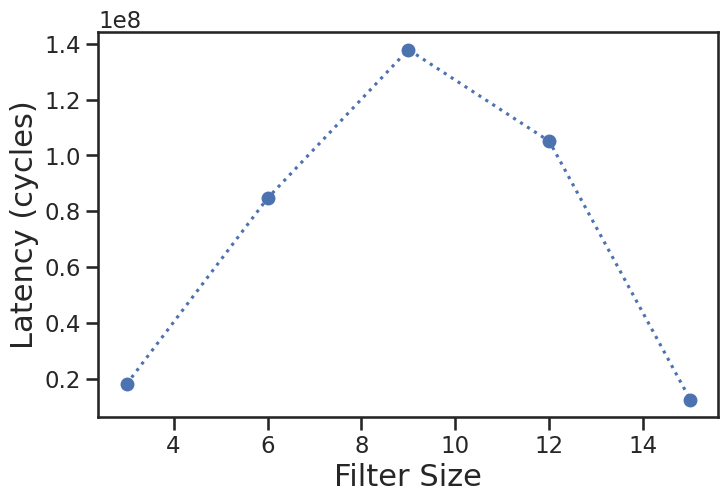

In [86]:
figure(figsize=(8, 5))
plt.plot(data['Filter Size'], o_stats['Cycles'], marker='o', linestyle='dotted')
plt.xlabel('Filter Size', fontsize = 22)
plt.ylabel('Latency (cycles)', fontsize = 22)
#plt.title('Latency vs. Filter Size', fontsize = 20)
plt.show()

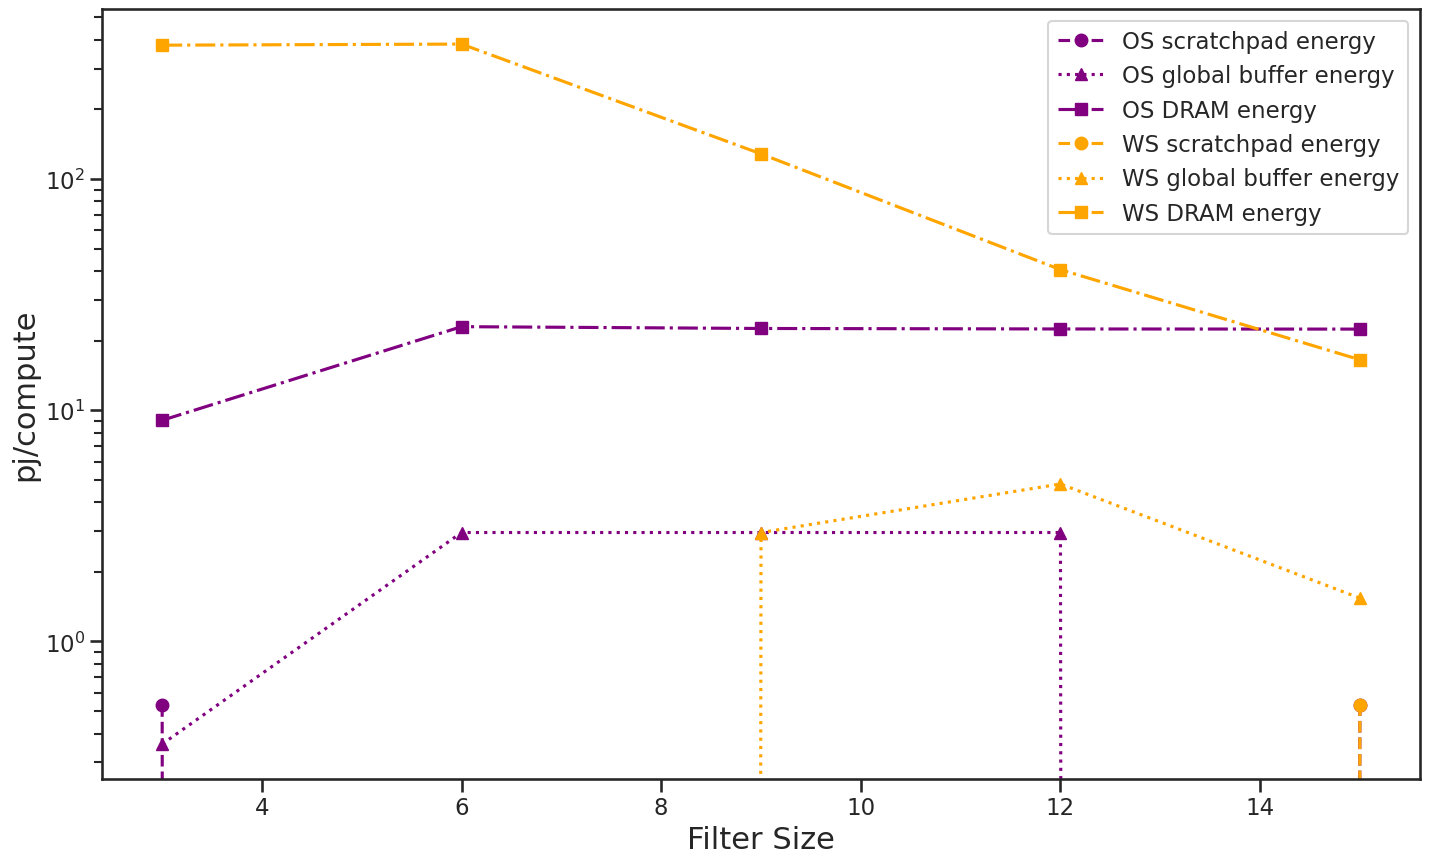

In [84]:
figure(figsize=(17, 10))

plt.plot(data['Filter Size'], o_stats['Scratchpad energy'], color='purple', marker='o', linestyle='dashed', label='OS scratchpad energy')
plt.plot(data['Filter Size'], o_stats['Global buffer energy'], color='purple', marker='^', linestyle='dotted', label='OS global buffer energy')
plt.plot(data['Filter Size'], o_stats['DRAM energy'], color='purple', marker='s', linestyle='dashdot', label='OS DRAM energy')

plt.plot(data['Filter Size'], w_stats['Scratchpad energy'], color='orange', marker='o', linestyle='dashed', label='WS scratchpad energy')
plt.plot(data['Filter Size'], w_stats['Global buffer energy'], color='orange', marker='^', linestyle='dotted', label='WS global buffer energy')
plt.plot(data['Filter Size'], w_stats['DRAM energy'], color='orange', marker='s', linestyle='dashdot', label='WS DRAM energy')

plt.xlabel("Filter Size", fontsize = 22)
plt.ylabel("pj/compute", fontsize = 22)
#plt.title('Component-wise Energy of Output and Weight Stationary vs. Filter Size', fontsize = 24)
plt.yscale("log")
plt.legend()

plt.show()

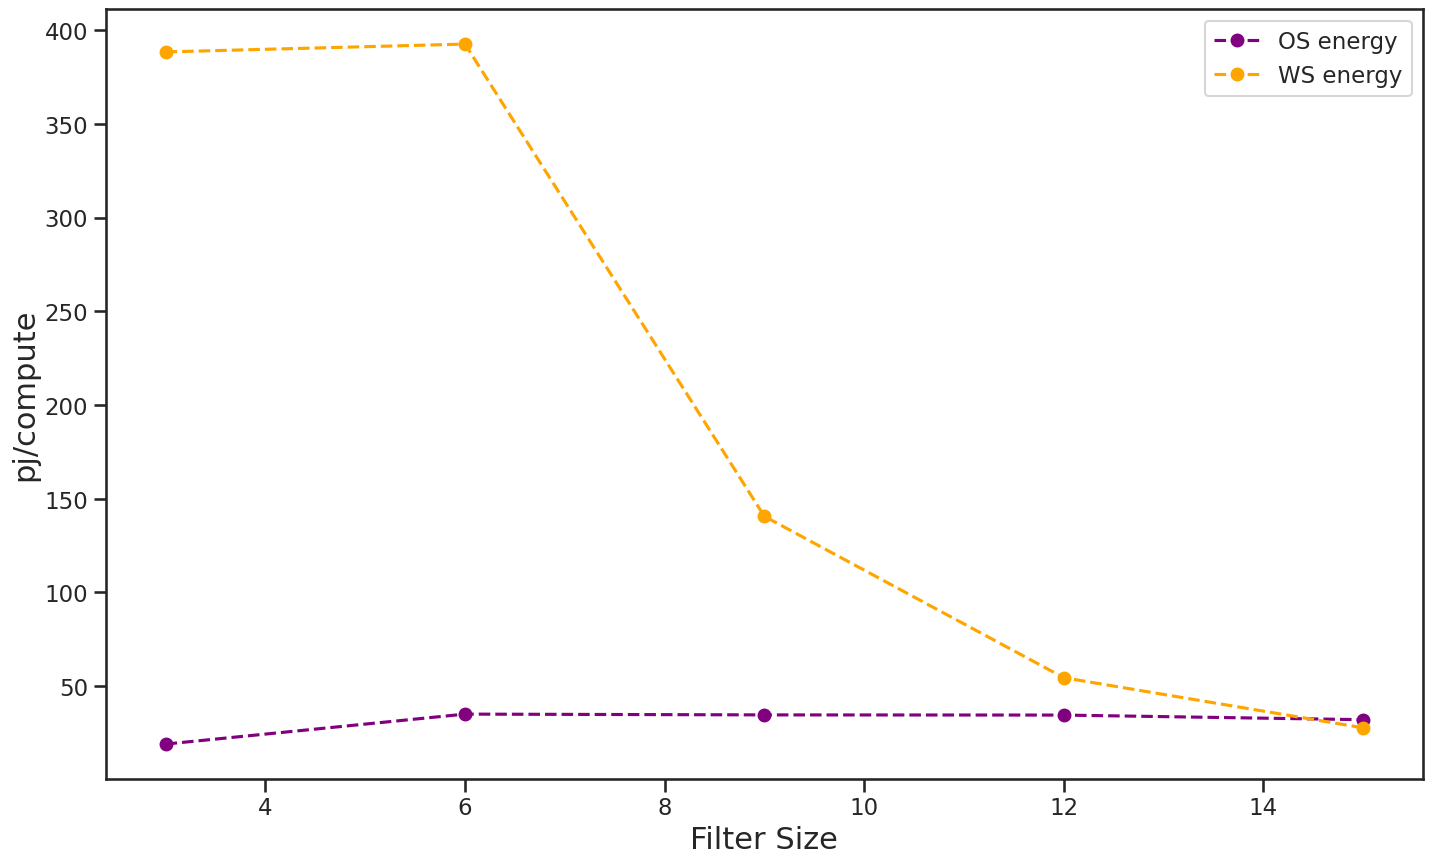

In [85]:
figure(figsize=(17, 10))

plt.plot(data['Filter Size'], o_energies, color='purple', marker='o', linestyle='dashed', label='OS energy')

plt.plot(data['Filter Size'], w_energies, color='orange', marker='o', linestyle='dashed', label='WS energy')

plt.xlabel("Filter Size", fontsize = 22)
plt.ylabel("pj/compute", fontsize = 22)
#plt.title('Power Consumption vs. Filter Size', fontsize = 27)
#plt.yscale("log")
plt.legend()

plt.show()

In [16]:
import math

pe_x = 17
pe_y = 31
filter_size=5

# Do padding to best match spatial arch using heuristics

if filter_size%pe_x==0 or filter_size%pe_y==0:
    padded_fs = filter_size
else:
    padded_fs_x = (math.floor(filter_size/pe_x)+1)*pe_x
    padded_fs_y = (math.floor(filter_size/pe_y)+1)*pe_y
    if padded_fs_x > padded_fs_y:
        padded_fs = padded_fs_y
    else:
        padded_fs = padded_fs_x
    if padded_fs-filter_size > filter_size/2:
        padded_fs = filter_size

17
31
17
5
5
